In [1]:
import numpy as np
np.set_printoptions(precision=3)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")

# The Multivariate Normal - Marginalization

## Objectives

+ To demonstrate marginalization with a multivariate normal.

## The multivariate mormal - Marginalization

Consider the $N$-dimensional multivariate normal:

$$
\mathbf{X} \sim N\left(\boldsymbol{\mu}, \boldsymbol{\Sigma}\right),
$$

where $\boldsymbol{\mu}$ is a $N$-dimensional vector, $\boldsymbol{\Sigma}$ is a *positive-definite matrix*.
In the lecture, we said that if you consider the marginal PDF of a component of $\mathbf{X}$, say $X_1$, then it will follow a Gaussian with mean $\mu_1$ and variance $\Sigma_{11}$.

Let's demonstrate this by sampling in the random vector $\mathbf{X}$ and making the histogram of its $X_1$ component.


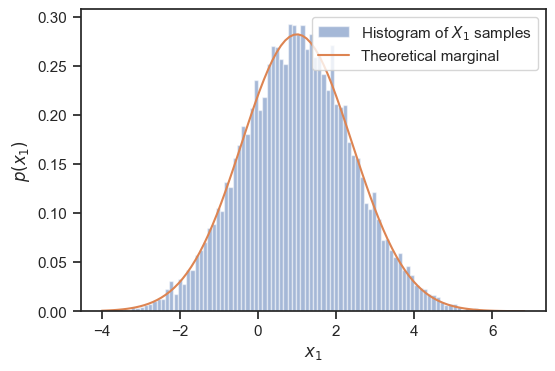

In [2]:
import scipy.stats as st

# The mean vector
mu = np.array([1.0, 2.0])
# The covariance matrix
Sigma = np.array(
    [
        [2.0, 0.9],
        [0.9, 4.0]
    ]
)

# The multivariate normal random vector
X = st.multivariate_normal(
    mean=mu,
    cov=Sigma
)

# Take some samples
num_samples = 10000
x_samples = X.rvs(size=num_samples)

# Now, just take the X1 components of these samples:
x1_samples = x_samples[:, 0]
# And draw their histogram
fig, ax = plt.subplots()
ax.hist(
    x1_samples,
    density=True,
    bins=100,
    alpha=0.5,
    label="Histogram of $X_1$ samples"
)

# Compare to the theoretical marginal with mean:
mu1 = mu[0]
# And variance:
Sigma11 = Sigma[0, 0]
X1_theory = st.norm(
    loc=mu1,
    scale=np.sqrt(Sigma11)
)
x1s = np.linspace(
    x1_samples.min(),
    x1_samples.max(),
    100
)
ax.plot(
    x1s,
    X1_theory.pdf(x1s),
    label="Theoretical marginal"
)
ax.set_xlabel(r"$x_1$")
ax.set_ylabel(r"$p(x_1)$")
plt.legend(loc="best");

## Questions 

+ Expand the code so that you produce the figure that gives you the marginal of the $X_2$ component of $\mathbf{X}$.